# Project 2 - Kaggle Challenges with (Titanic Survival - Classification)

## Problem Statement
---

The Titanic challenge is a competition hosted by [Kaggle](https://www.kaggle.com/c/titanic/overview) where the goal is to predict if a given passenger survived or not. In this project, we should find the best predictive model that answers the question: “what sorts of people were more likely to survive?” based on a set of variables describing each passenger (ex. name, age, gender, passenger class, etc).

Since we are trying to predict passenger survival, which is given in the dataset, the problem is a supervised learning problem. And since 'survived' is a categorical variable, this is a classification problem, which we tried to solve using (KNN, Decision Tree, Ensemble-Bagging, and Random Forests) Classifiers. And we used the accuracy measure to evaluate our predictions since it’s the metric that the competition uses in the leaderboard, in addition to F1 score.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import](#Data-Import)
- [Data Cleaning and Exploratory Analysis](#Data-Cleaning-and-EDA)
- [Data Visualization](#Data-Visualization)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Evaluation and Conceptual Understanding](#Evaluation-and-Conceptual-Understanding)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Datasets Description
-----

**test.csv:**
 - [Data Source](http://www.kaggle.com/c/titanic-gettingStarted/data)
 - Data Information: Test data for Kaggle Titanic competition.

**train.csv:**
 - [Data Source](http://www.kaggle.com/c/titanic-gettingStarted/data)
 - Data Information: Training data for Kaggle Titanic competition.
 
**Data Dictionary**

This data dictionary and subsequent info was obtained from [Kaggle](https://www.kaggle.com/c/titanic/overview).

| Variable |	Description  | 	Details  |
|----------|-----------------|-----------|
| survival | 	Passenger survived or not  | 	0 = No; 1 = Yes  |
| pclass  | 	Passengers' ticket class  | Class	1 = 1st; 2 = 2nd; 3 = 3rd  |
| name  | 	First and Last Name  |	   |
| sex  |	Passenger gender	  | male; female  |
| age  |	Passenger age	  |  Age is in Years, Fractional if Age less than One  |
| sibsp  |	Number of Siblings/Spouses Aboard  |	  | 
| parch  |	Number of Parents/Children Aboard	  |   |
| ticket  |	Ticket Number	  |     |
| fare  |	Passenger Fare	  |   |
| cabin  |	Passengers' cabin number	   |
| embarked  |	Port of Embarkation  |	C = Cherbourg; Q = Queenstown; S = Southampton  |

## Data Import
---

#### Import Necessary Libraries:

In [796]:
# All libraries used in this project are added here
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

import seaborn as sns
sns.set(font_scale=1.1)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import f1_score

#### Read In The Titanic Data:

In [797]:
# read the Titanic dataset (both train & test) and save them as pandas data frames
                           
Titanic_train = pd.read_csv('./DataSet/train.csv')
Titanic_test = pd.read_csv('./DataSet/test.csv')

## Data Cleaning and EDA
---

### Inspect the data:

In [798]:
# show the first rows of Titanic_train dataframe
Titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [799]:
# show the first rows of Titanic_test dataframe
Titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [800]:
#show the dimensions of the data
print('Training data:' , Titanic_train.shape)
print('Testing data:' , Titanic_test.shape)

Training data: (891, 12)
Testing data: (418, 11)


In [801]:
# show the basic information about train data (check: data types, null values)
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [802]:
# show the basic information about train data (check: data types, null values)
Titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [803]:
def print_unique_values(col):
    print('Counts of unique values in the column [', col.name,']:') 
    display( col.value_counts().to_frame() )

def print_data_range(col):
    print('Data range in the column [', col.name,']: (', col.min(),',', col.max(), ')')

In [804]:
# Inspect for irregular values in training dataset

print_unique_values(Titanic_train['Survived'])
print_unique_values(Titanic_train['Pclass'])
print_unique_values(Titanic_train['Sex'])
print_unique_values(Titanic_train['Embarked'])

print_data_range(Titanic_train['Age'])
print_data_range(Titanic_train['Fare'])

Counts of unique values in the column [ Survived ]:


,Survived
0,549
1,342


Counts of unique values in the column [ Pclass ]:


,Pclass
3,491
1,216
2,184


Counts of unique values in the column [ Sex ]:


,Sex
male,577
female,314


Counts of unique values in the column [ Embarked ]:


,Embarked
S,644
C,168
Q,77


Data range in the column [ Age ]: ( 0.42 , 80.0 )
Data range in the column [ Fare ]: ( 0.0 , 512.3292 )


In [805]:
# Inspect for irregular values in testing dataset

print_unique_values(Titanic_test['Pclass'])
print_unique_values(Titanic_test['Sex'])
print_unique_values(Titanic_test['Embarked'])

print_data_range(Titanic_test['Age'])
print_data_range(Titanic_test['Fare'])

Counts of unique values in the column [ Pclass ]:


,Pclass
3,218
1,107
2,93


Counts of unique values in the column [ Sex ]:


,Sex
male,266
female,152


Counts of unique values in the column [ Embarked ]:


,Embarked
S,270
C,102
Q,46


Data range in the column [ Age ]: ( 0.17 , 76.0 )
Data range in the column [ Fare ]: ( 0.0 , 512.3292 )


### General observations from the data inspection:
 - There are 891 rows and 12 columns in the training data
 - There are 418 rows and 11 columns in the testing data
 - There are no weird values or inconsistent data in both datasets, however there are some missing values
 - The columns \['Pclass', 'Sex', 'Embarked'\] are categorical variables, (may need Label Encoding or One Hot Encoding !)

**In Training Data**
 - in 'Age' column (177 values are missing)
 - in 'Cabin' column (687 values are missing)
 - in 'Embarked' column (2 values are missing)
 
**In Testing Data**
 - in 'Age' column (86 values are missing)
 - in 'Cabin' column (327 values are missing)
 - in 'Fare' column (1 value is missing)

### Data Cleaning:

In [806]:
# Rename the columns to something that is more readable

Titanic_train.columns = ['passenger_id', 'survived', 'ticket_class', 'name', 'sex', 'age', 
                         'num_of_siblings_spouses', 'num_of_parents_children', 
                       'ticket_number', 'passenger_fare', 'cabin_number', 'port_of_embarkation']

Titanic_test.columns = ['passenger_id', 'ticket_class', 'name', 'sex', 'age', 
                         'num_of_siblings_spouses', 'num_of_parents_children', 
                       'ticket_number', 'passenger_fare', 'cabin_number', 'port_of_embarkation']

In [807]:
# map the string categorical values in "sex" column to numerical ones  
# Label Encoding: (male = 1), (female = 0)
Titanic_train['sex'] = Titanic_train['sex'].astype('category').cat.codes
Titanic_test['sex'] = Titanic_test['sex'].astype('category').cat.codes

In [808]:
# Fill null values in the 'Age' column by the median age of the same gender 
Titanic_train["age"].fillna(Titanic_train.groupby("sex")["age"].transform("median"), inplace=True)
Titanic_test["age"].fillna(Titanic_test.groupby("sex")["age"].transform("median"), inplace=True)

# Round numbers in the 'Age' column
Titanic_train['age']=round(Titanic_train['age'], 1)
Titanic_test['age']=round(Titanic_test['age'], 1)

In [809]:
# Drop the entire "ticket_number" column, as it does not contain any useful information in the modeling process
Titanic_train.drop(columns=['ticket_number'], axis=1, inplace=True)
Titanic_test.drop(columns=['ticket_number'], axis=1, inplace=True)

In [810]:
# Fill null values in the 'passenger_fare' column by the median
Titanic_test['passenger_fare'].fillna(Titanic_test['passenger_fare'].median(), inplace=True)

In [811]:
# Drop the entire "cabin_number" column because it contains a huge number of missing values that are difficult to handle
Titanic_train.drop(columns=['cabin_number'], axis=1, inplace=True)
Titanic_test.drop(columns=['cabin_number'], axis=1, inplace=True)

In [812]:
# Fill null values in the 'port_of_embarkation' column by the mode number
Titanic_train['port_of_embarkation'].fillna(Titanic_train['port_of_embarkation'].mode()[0], inplace=True)

In [813]:
## Create a new column (numeric_embarkation)
## ONLY for the purpose of visualization and linear correlations computations##

# map the string categorical values in "port_of_embarkation" column to numerical ones
# Label Encoding: (S = 2), (Q = 1), (C = 0)  
Titanic_train['numeric_embarkation'] = Titanic_train['port_of_embarkation'].astype('category').cat.codes

In [814]:
# check if we handled all null values
Titanic_train.isnull().sum()

passenger_id               0
survived                   0
ticket_class               0
name                       0
sex                        0
age                        0
num_of_siblings_spouses    0
num_of_parents_children    0
passenger_fare             0
port_of_embarkation        0
numeric_embarkation        0
dtype: int64

In [815]:
# check if we handled all null values
Titanic_test.isnull().sum()

passenger_id               0
ticket_class               0
name                       0
sex                        0
age                        0
num_of_siblings_spouses    0
num_of_parents_children    0
passenger_fare             0
port_of_embarkation        0
dtype: int64

In [816]:
Titanic_train.dtypes

passenger_id                 int64
survived                     int64
ticket_class                 int64
name                        object
sex                           int8
age                        float64
num_of_siblings_spouses      int64
num_of_parents_children      int64
passenger_fare             float64
port_of_embarkation         object
numeric_embarkation           int8
dtype: object

In [817]:
Titanic_test.dtypes

passenger_id                 int64
ticket_class                 int64
name                        object
sex                           int8
age                        float64
num_of_siblings_spouses      int64
num_of_parents_children      int64
passenger_fare             float64
port_of_embarkation         object
dtype: object

### Feature Engineering:  (creating new columns)

#### Column \['has_family'\]

Because (num_of_siblings_spouses) and (num_of_parents_children) have a very close meaning that represents the "Family",  we can combine these 2 features together to maybe capture the differences in each class of these features.

In [818]:
# use ['num_of_siblings_spouses', 'num_of_parents_children'] columns, 
# to create a new column that tells if the passenger has a family or not

Titanic_train['has_family'] = ( (Titanic_train['num_of_siblings_spouses']) | (Titanic_train['num_of_parents_children']) ).astype(bool).astype(int)
Titanic_test['has_family'] = ( (Titanic_test['num_of_siblings_spouses']) | (Titanic_test['num_of_parents_children']) ).astype(bool).astype(int)

#### Column \['title'\]

The "name" column, does not actually contain any useful information in the modeling process, however, we can extract the passenger titles from it, such as (Miss, Mrs, Master, Dona, ...etc). This way, we may have more useful information about the passenger's social status.

In [819]:
# use "name" column to extract the titles of passengers 

# check what the different titles are in the train set
titles = set()
for name in Titanic_train['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Rev', 'Mlle', 'Mrs', 'Ms', 'Major', 'Master', 'the Countess', 'Miss', 'Mr', 'Col', 'Lady', 'Capt', 'Mme', 'Dr', 'Sir', 'Jonkheer', 'Don'}


In [820]:
# create a dictionary to assign each title to one category

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "the Countess":"Royalty",
    "Lady" : "Royalty",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Mlle": "Miss",
    "Mr" : "Mr",
    "Master" : "Mr"
}

# extract the title from each name
Titanic_train['title'] = Titanic_train['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
Titanic_test['title'] = Titanic_test['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())


# map each title to its category
Titanic_train['title'] = Titanic_train.title.map(Title_Dictionary)
Titanic_test['title'] = Titanic_test.title.map(Title_Dictionary)

# Now, drop the entire "name" column, as it does not contain any useful information in the modeling process
Titanic_train.drop(columns=['name'], axis=1, inplace=True)
Titanic_test.drop(columns=['name'], axis=1, inplace=True)

In [821]:
## Create a new column (numeric_title)
## ONLY for the purpose of visualization and linear correlations computations##

# map the string categorical values in "title" column to numerical ones
Titanic_train['numeric_title'] = Titanic_train['title'].astype('category').cat.codes

In [822]:
# check data after modifications
Titanic_train.head()

,passenger_id,survived,ticket_class,sex,age,num_of_siblings_spouses,num_of_parents_children,passenger_fare,port_of_embarkation,numeric_embarkation,has_family,title,numeric_title
0,1,0,3,1,22.0,1,0,7.2500,S,2,1,Mr,1
1,2,1,1,0,38.0,1,0,71.2833,C,0,1,Mrs,2
2,3,1,3,0,26.0,0,0,7.9250,S,2,0,Miss,0
3,4,1,1,0,35.0,1,0,53.1000,S,2,1,Mrs,2
4,5,0,3,1,35.0,0,0,8.0500,S,2,0,Mr,1


In [823]:
# check data after modifications
Titanic_test.head()

,passenger_id,ticket_class,sex,age,num_of_siblings_spouses,num_of_parents_children,passenger_fare,port_of_embarkation,has_family,title
0,892,3,1,34.5,0,0,7.8292,Q,0,Mr
1,893,3,0,47.0,1,0,7.0000,S,1,Mrs
2,894,2,1,62.0,0,0,9.6875,Q,0,Mr
3,895,3,1,27.0,0,0,8.6625,S,0,Mr
4,896,3,0,22.0,1,1,12.2875,S,1,Mrs


### Exploratory Data Analysis:

In [824]:
# show summary statistics for training dataset
Titanic_train.drop('passenger_id', axis=1).describe()

,survived,ticket_class,sex,age,num_of_siblings_spouses,num_of_parents_children,passenger_fare,numeric_embarkation,has_family,numeric_title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.441302,0.523008,0.381594,32.204208,1.536476,0.397306,0.993266
std,0.486592,0.836071,0.477990,13.018673,1.102743,0.806057,49.693429,0.791503,0.489615,0.693436
min,0.000000,1.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,4.000000


In [825]:
# show summary statistics for testing dataset
Titanic_test.drop('passenger_id', axis=1).describe()

,ticket_class,sex,age,num_of_siblings_spouses,num_of_parents_children,passenger_fare,has_family
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,29.599282,0.447368,0.392344,35.576535,0.394737
std,0.841838,0.481622,12.703768,0.896760,0.981429,55.850103,0.489380
min,1.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.471875,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000


## Data Visualization

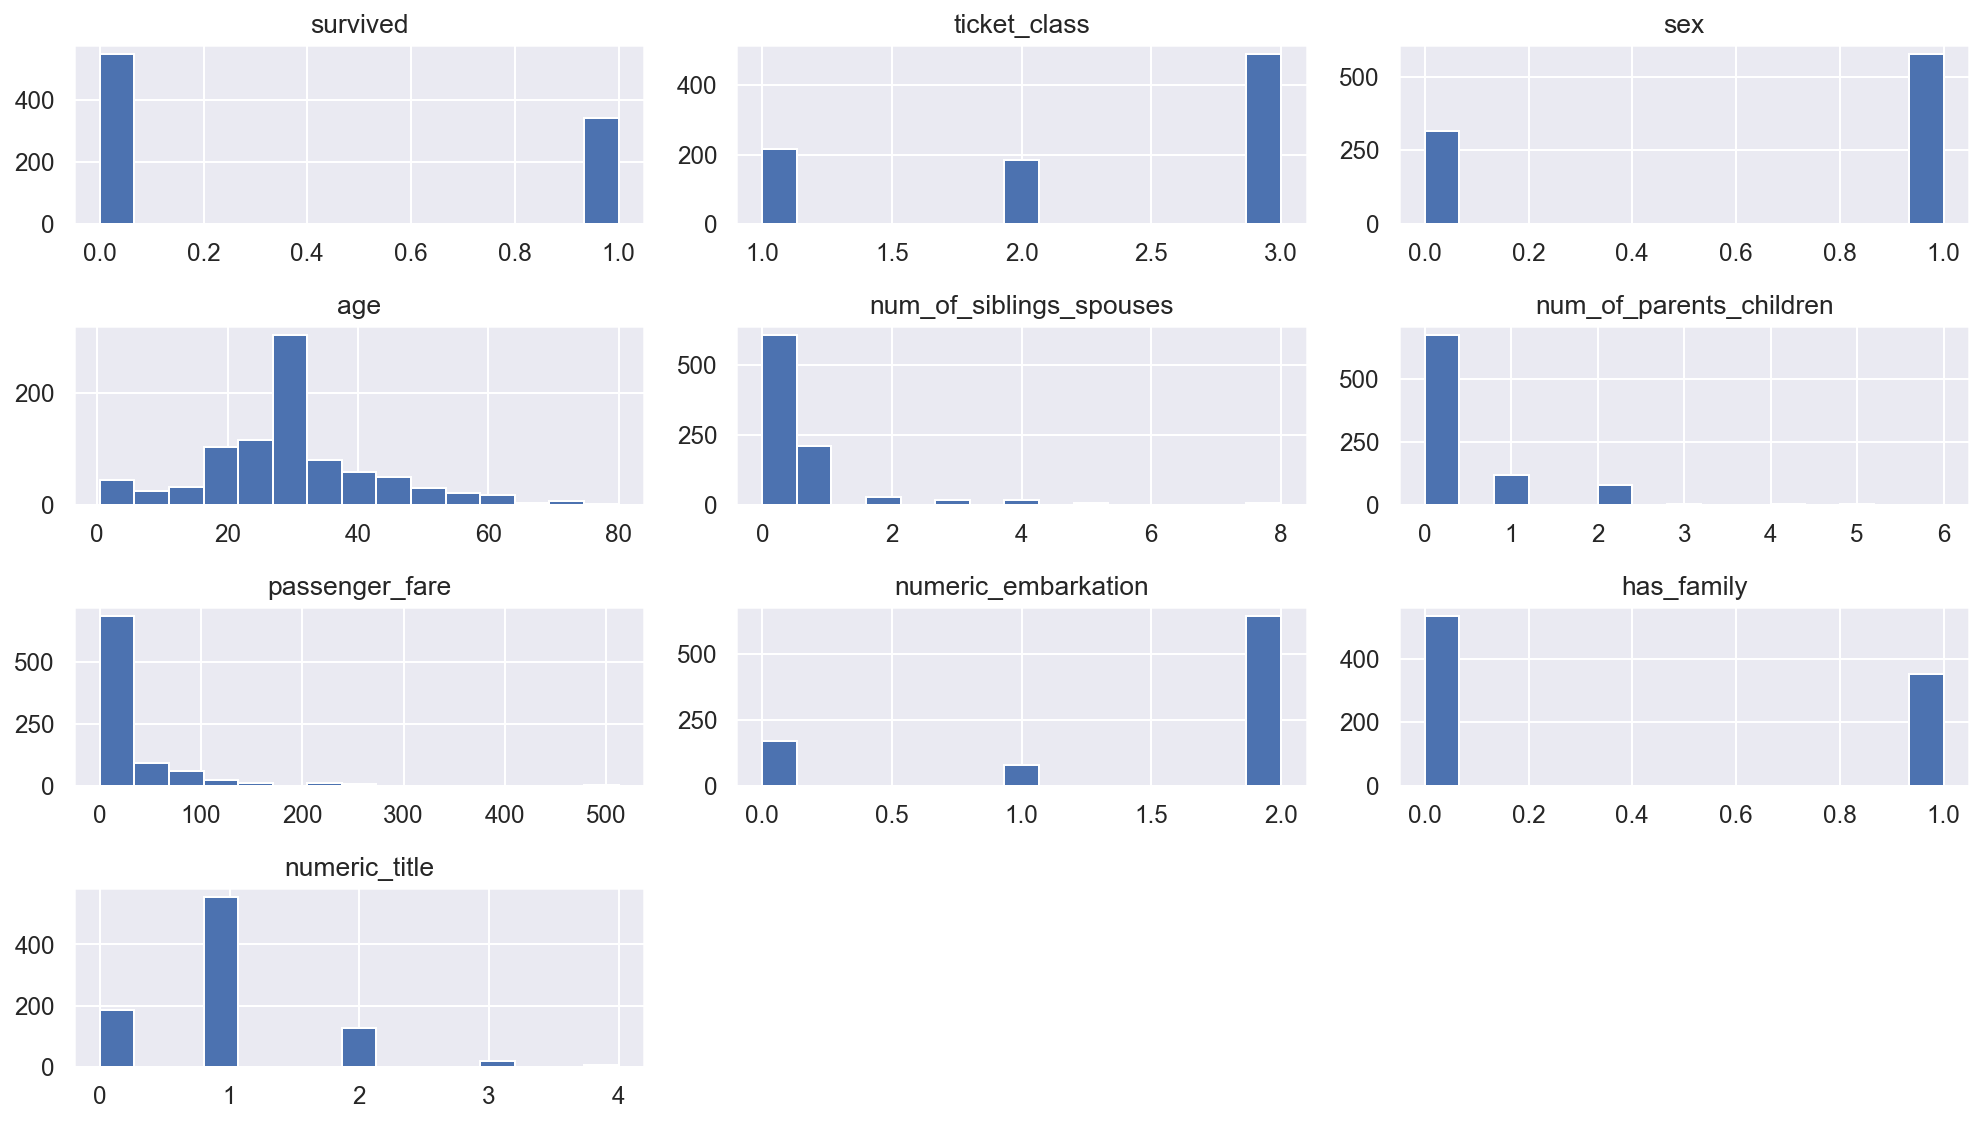

In [826]:
# visualize the training data distribution
Titanic_train.drop('passenger_id', axis=1).hist(figsize=(14, 8), bins=15);
plt.tight_layout();

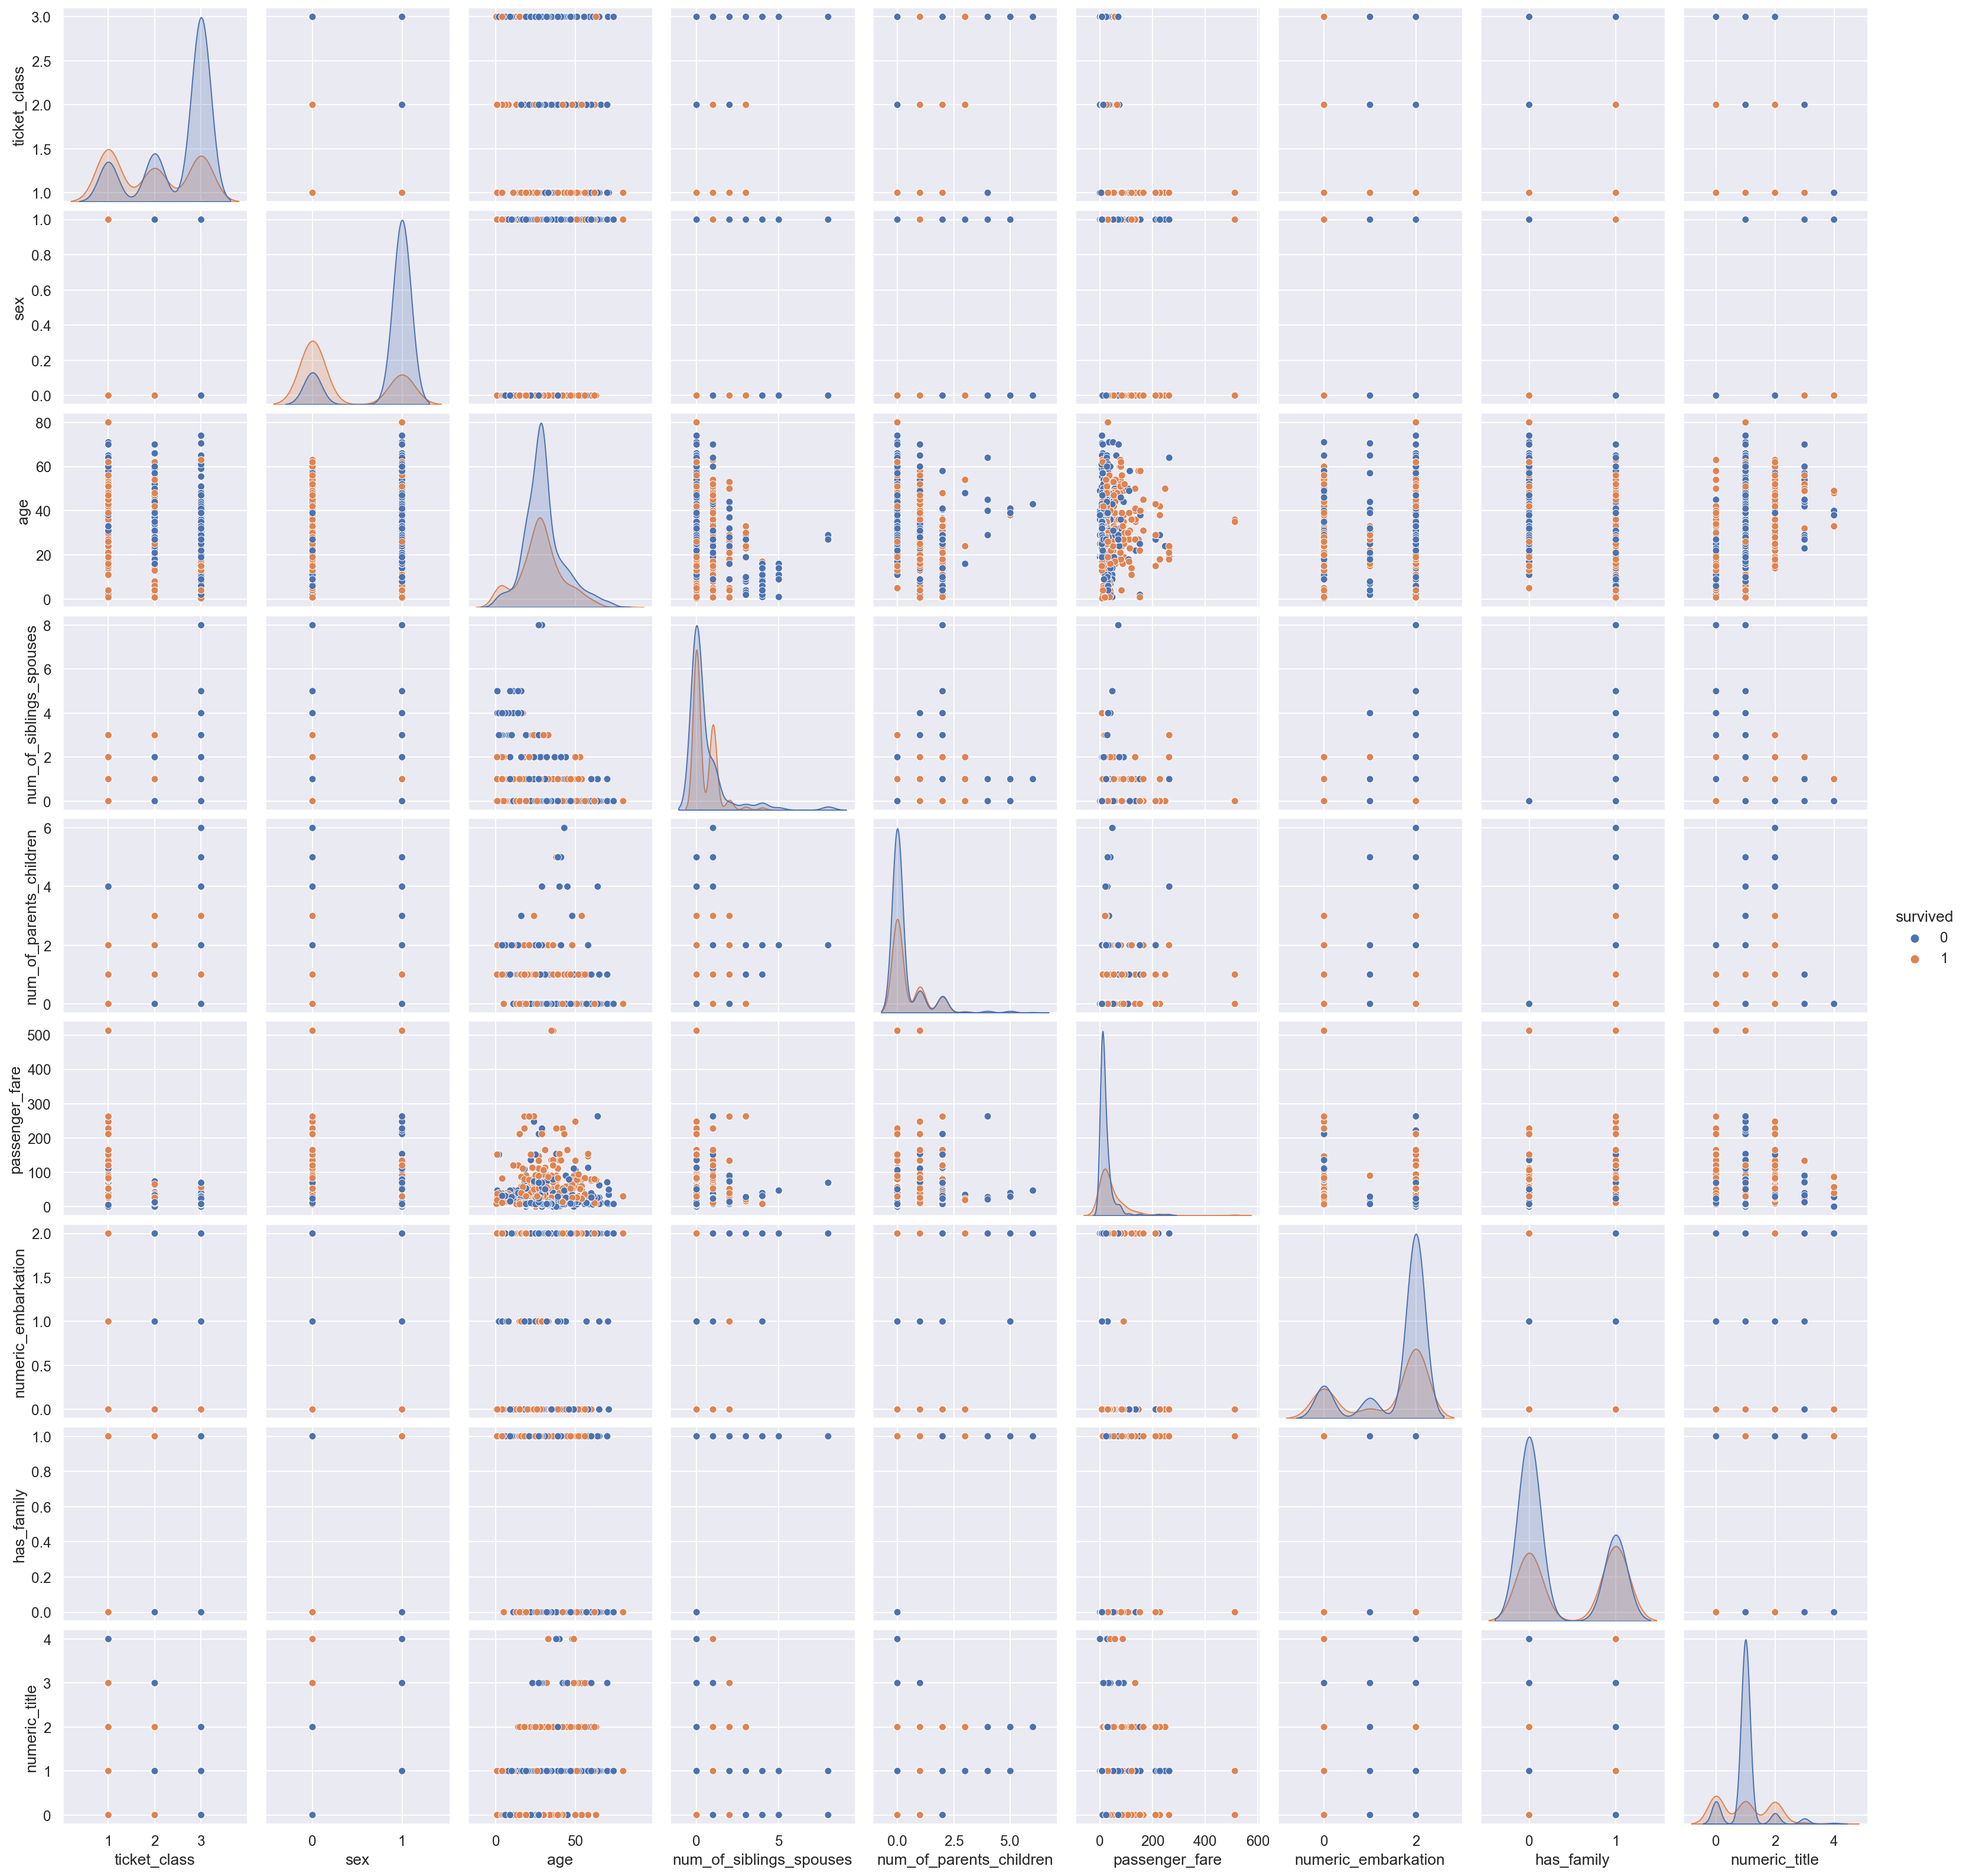

In [827]:
# visualize a pairplot for all features in training data 
sns.pairplot(Titanic_train.drop('passenger_id', axis=1), hue='survived');

In [828]:
## slice of data to use for bar visualization
bar_data = Titanic_train[['survived', 'ticket_class', 'sex', 'numeric_embarkation', 'has_family', 'title']]
bar_data['died'] = 1 - bar_data['survived']

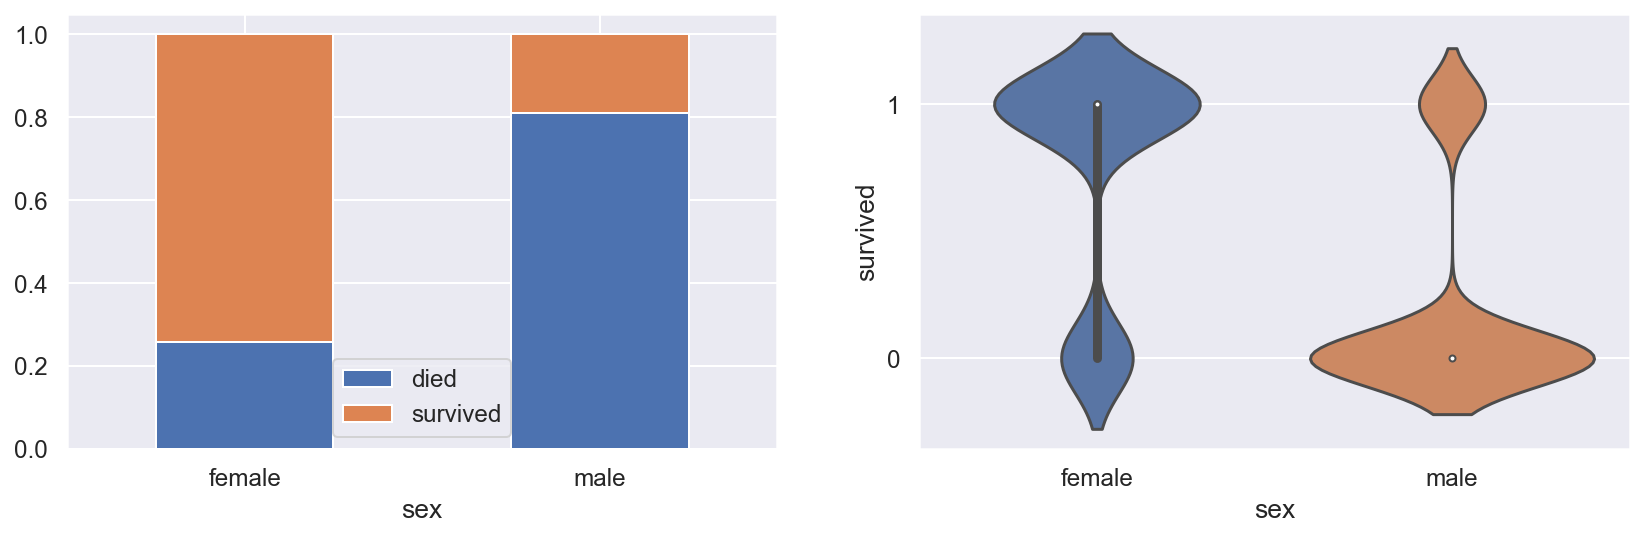

In [829]:
# visualize survival based on gender

fig, ax =plt.subplots(1,2, figsize=(14,4))

bar_data.groupby('sex').agg('mean')[['died', 'survived']].plot(kind='bar', stacked=True , ax=ax[0]);
ax[0].set_xticklabels(['female','male'] , rotation=0);

sns.violinplot(x="sex", y="survived", data=Titanic_train, size=5, ax=ax[1]);
ax[1].set_xticklabels(['female','male']);
ax[1].set(yticks=[0,1]);

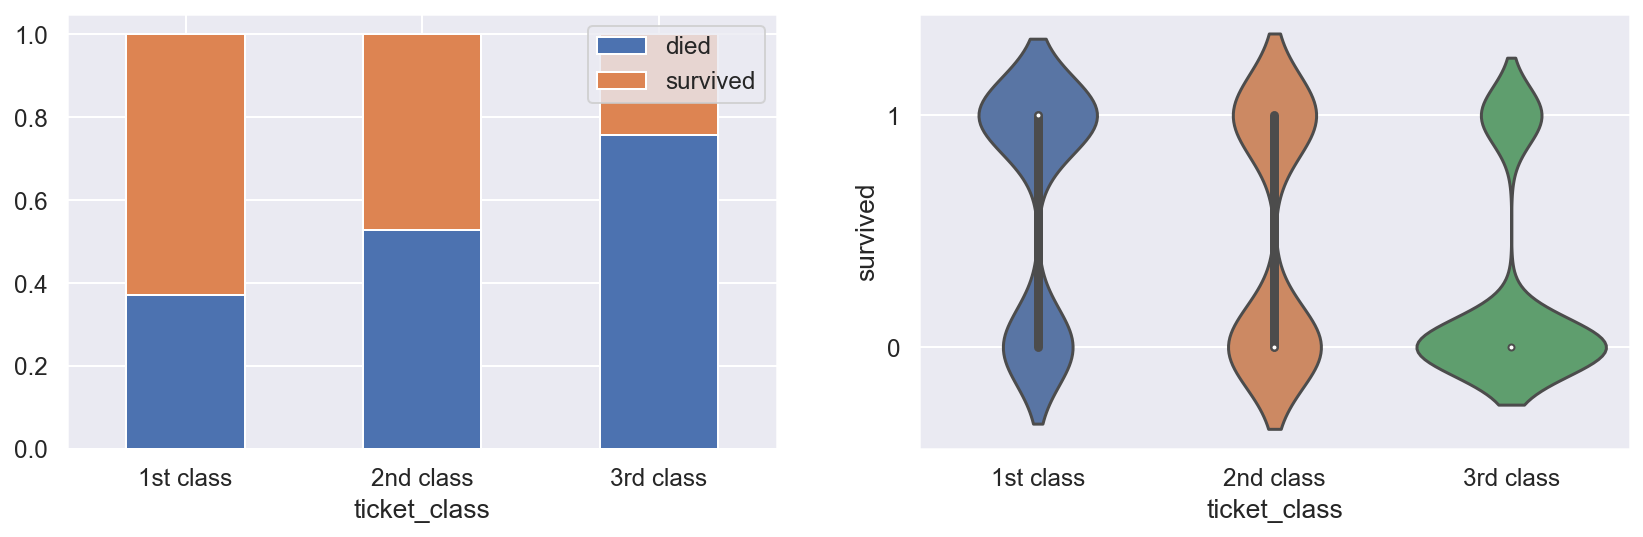

In [830]:
# visualize survival based on Passengers' ticket class

fig, ax =plt.subplots(1,2, figsize=(14,4))

bar_data.groupby('ticket_class').agg('mean')[['died', 'survived']].plot(kind='bar', stacked=True , ax=ax[0]);
ax[0].set_xticklabels(['1st class', '2nd class' , '3rd class'] , rotation=0);

sns.violinplot(x="ticket_class", y="survived", data=Titanic_train, size=5, ax=ax[1]);
ax[1].set_xticklabels(['1st class', '2nd class' , '3rd class']);
ax[1].set(yticks=[0,1]);

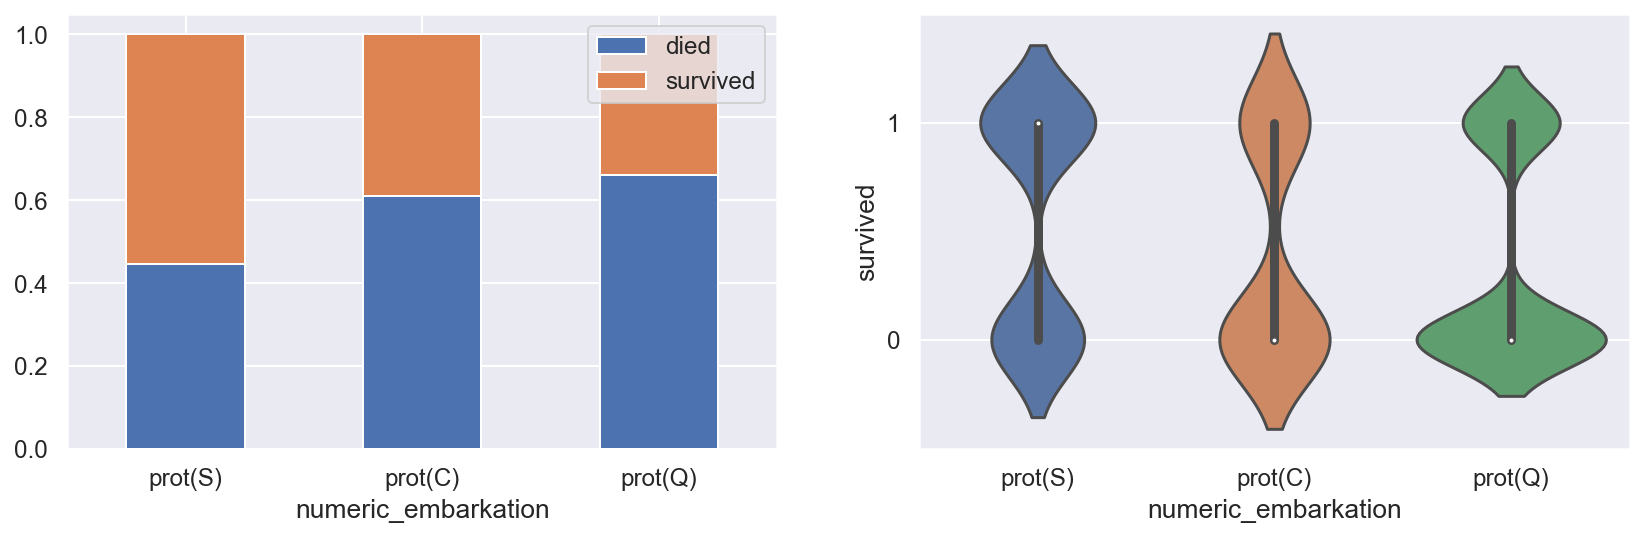

In [831]:
# visualize survival based on port_of_embarkation

fig, ax =plt.subplots(1,2, figsize=(14,4))

bar_data.groupby('numeric_embarkation').agg('mean')[['died', 'survived']].plot(kind='bar', stacked=True , ax=ax[0]);
ax[0].set_xticklabels(['prot(S)', 'prot(C)' , 'prot(Q)'] , rotation=0);

sns.violinplot(x="numeric_embarkation", y="survived", data=Titanic_train, size=5, ax=ax[1]);
ax[1].set_xticklabels(['prot(S)', 'prot(C)' , 'prot(Q)']);
ax[1].set(yticks=[0,1]);

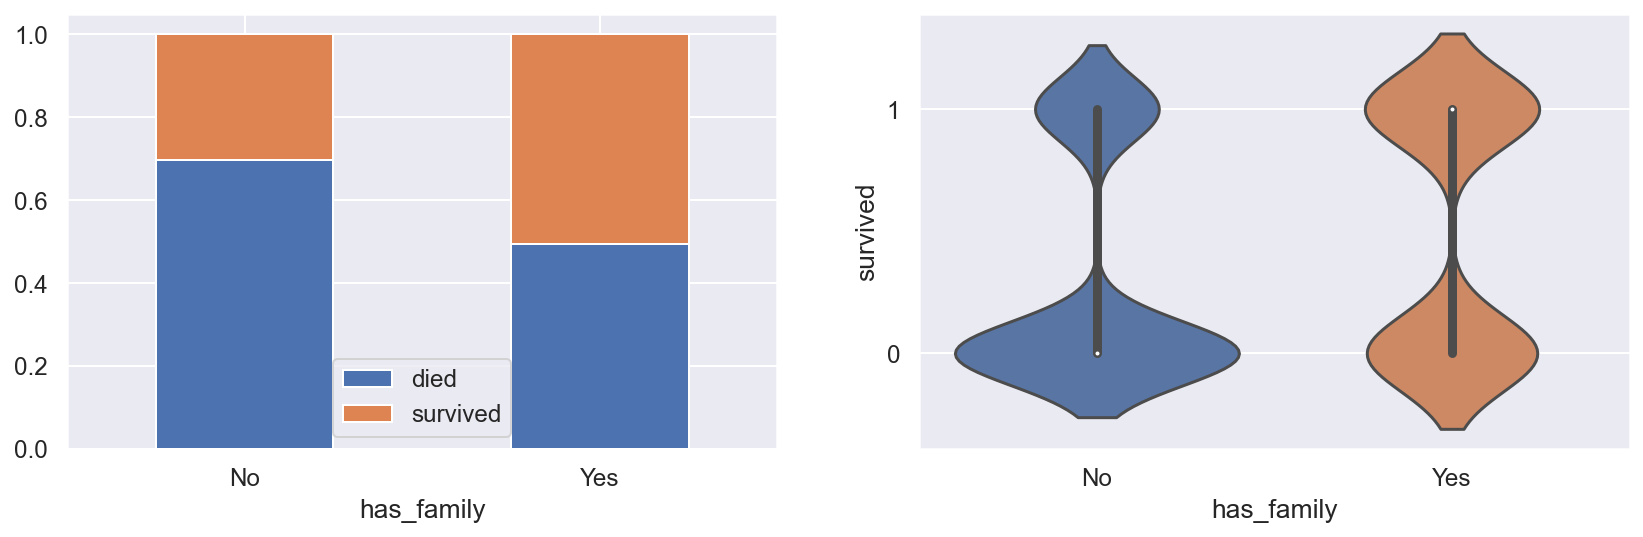

In [832]:
# visualize survival based on the family presence

fig, ax =plt.subplots(1,2, figsize=(14,4))

bar_data.groupby('has_family').agg('mean')[['died', 'survived']].plot(kind='bar', stacked=True , ax=ax[0]);
ax[0].set_xticklabels(['No', 'Yes'] , rotation=0);

sns.violinplot(x="has_family", y="survived", data=Titanic_train, size=5, ax=ax[1]);
ax[1].set_xticklabels(['No', 'Yes']);
ax[1].set(yticks=[0,1]);

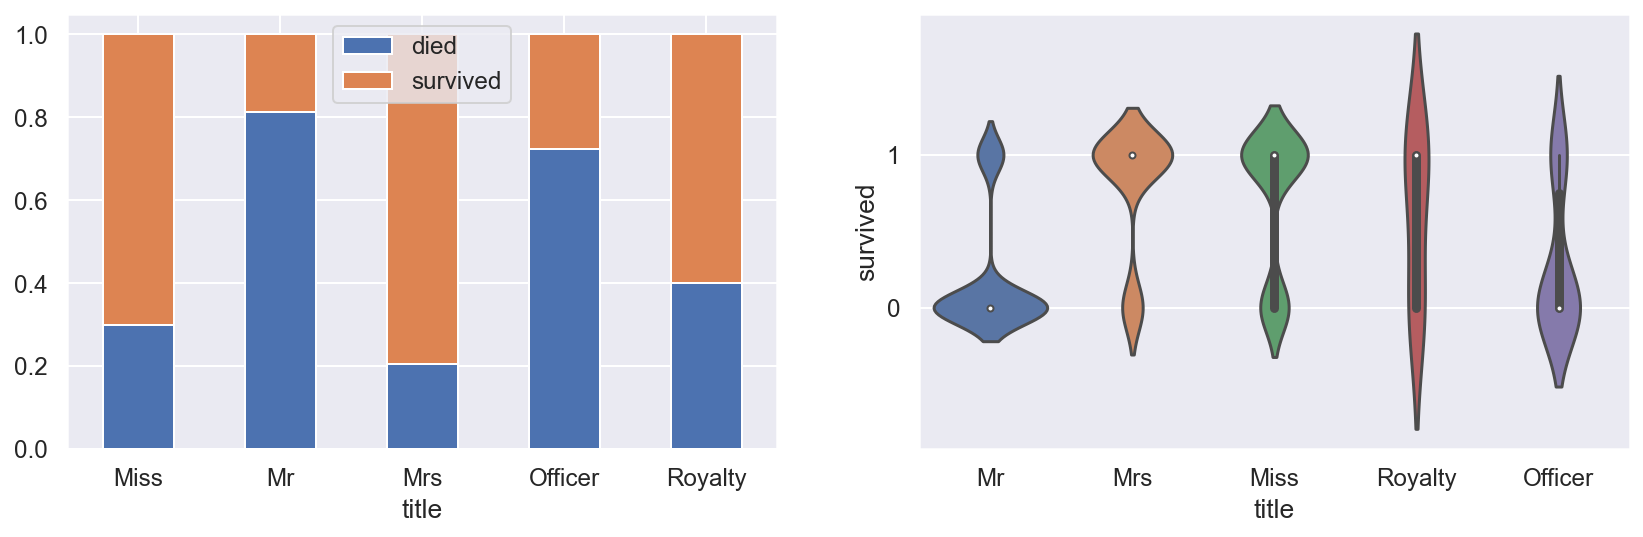

In [833]:
# visualize survival based on the family presence

fig, ax =plt.subplots(1,2, figsize=(14,4))

bar_data.groupby('title').agg('mean')[['died', 'survived']].plot(kind='bar', stacked=True , ax=ax[0]);
ax[0].set_xticklabels(['Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'] , rotation=0);

sns.violinplot(x="title", y="survived", data=Titanic_train, size=5, ax=ax[1]);
ax[1].set(yticks=[0,1]);

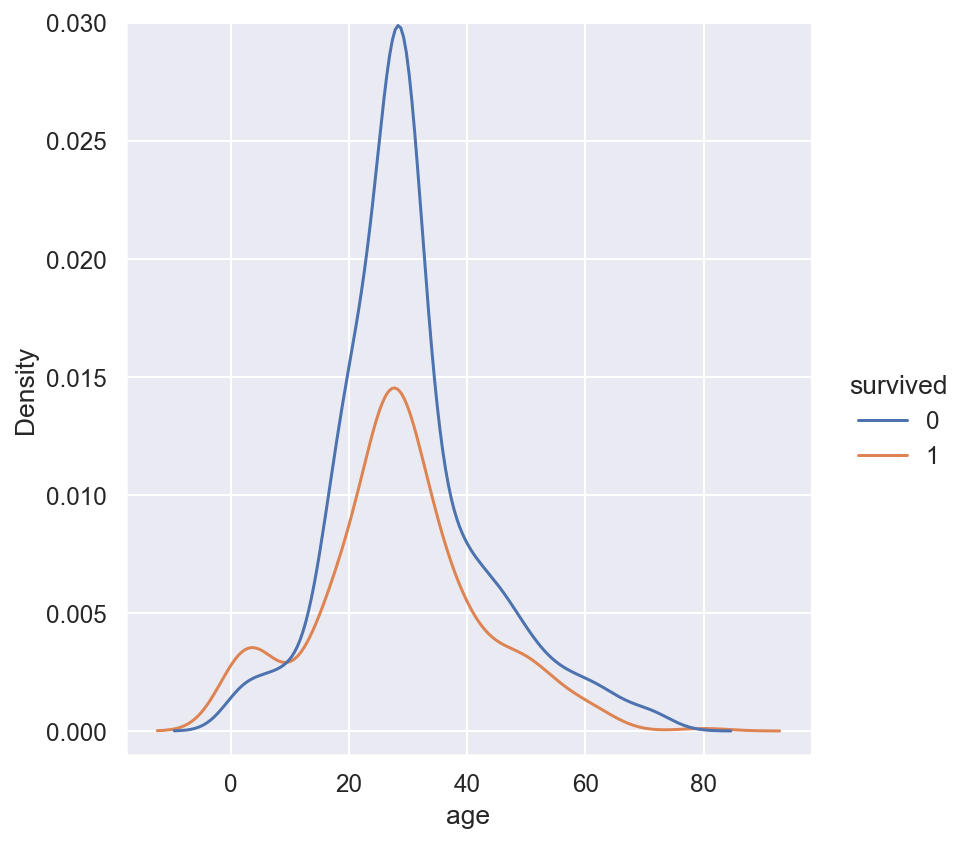

In [834]:
# visualize survival based on Age
sns.displot(data=Titanic_train, x='age', hue='survived', kind="kde", height=6);
plt.ylim([-0.001, 0.030]);

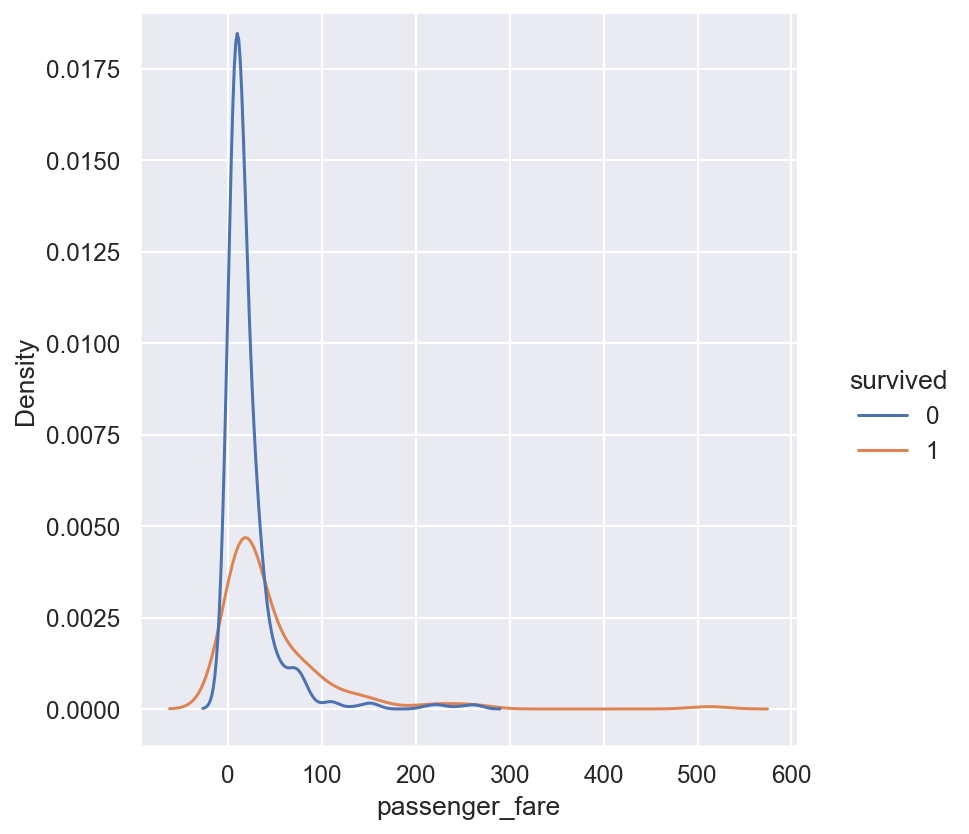

In [835]:
# visualize survival based on passenger_fare
sns.displot(data=Titanic_train, x='passenger_fare', hue='survived', kind="kde", height=6);
plt.ylim([-0.001, 0.0190]);

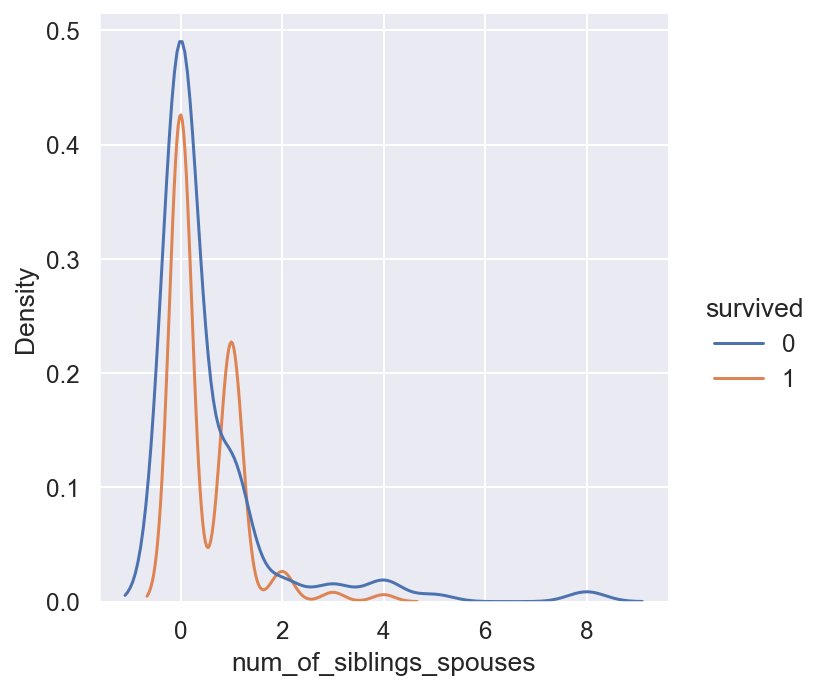

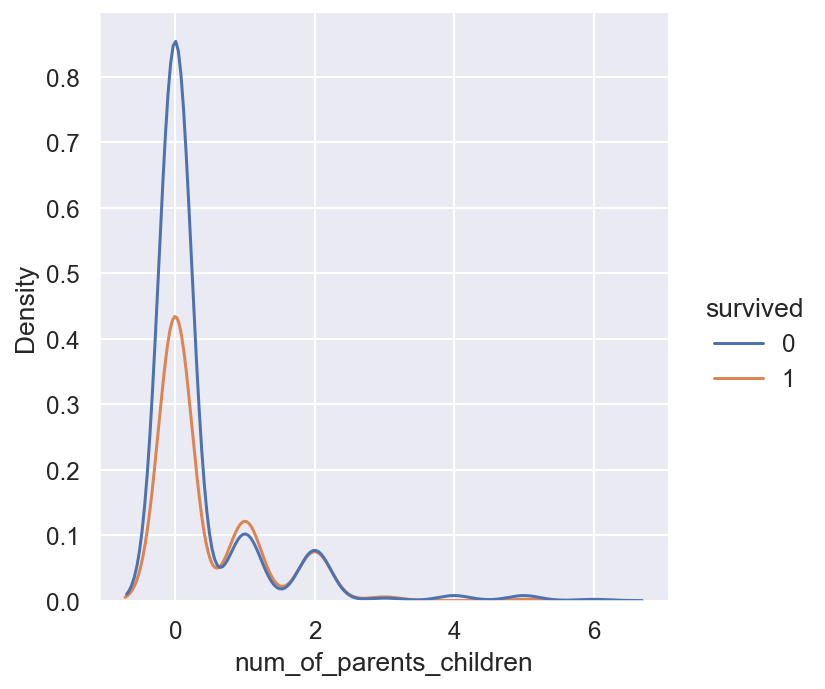

In [836]:
# visualize survival based on number of family members
sns.displot(data=Titanic_train, x='num_of_siblings_spouses', hue='survived', kind="kde");
sns.displot(data=Titanic_train, x='num_of_parents_children', hue='survived', kind="kde");

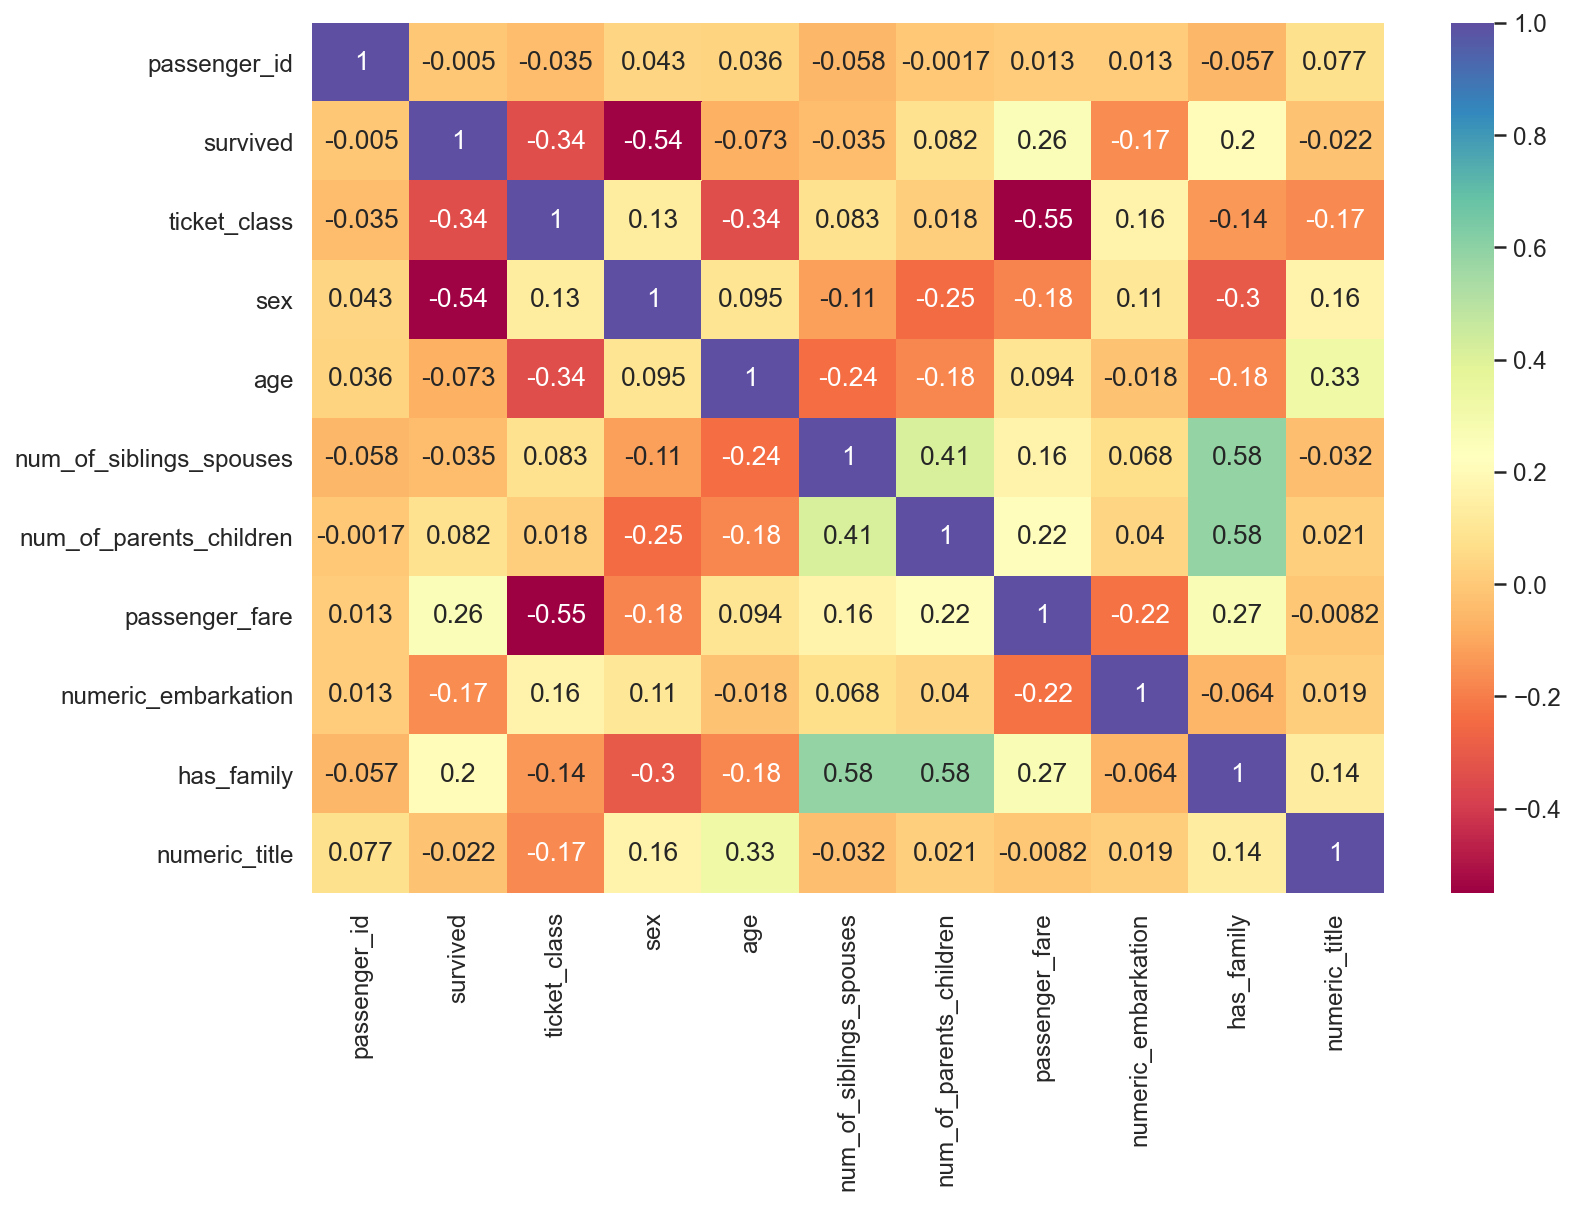

In [837]:
# visualize the linear correlations between all numeric variables
plt.figure(figsize=(12,8))
sns.heatmap(Titanic_train.corr(), annot=True, cmap='Spectral');

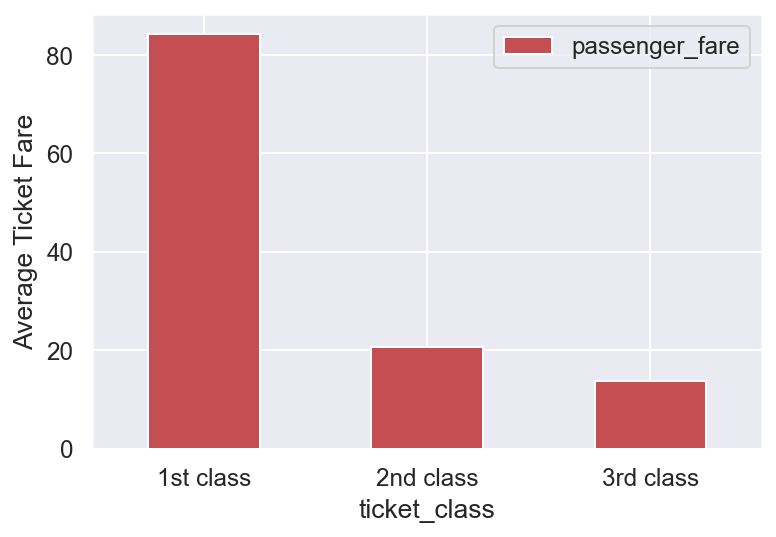

In [838]:
# visualize the correlation between the ticket_class and passenger_fare features 
Titanic_train.groupby('ticket_class').agg('mean')[['passenger_fare']].plot(kind='bar', color='r', figsize=(6,4));
plt.xticks(ticks=[0,1,2] , labels=['1st class', '2nd class' , '3rd class'], rotation=0);
plt.ylabel('Average Ticket Fare');

### General observations from the data visualization:
 - The histogram plots above show that all data don't have a normal distribution, however, it seems that the data in the age column are nearly normally distributed. (since the data are not normally distributed, we may need to try methods that use bootstrapping and ensemble bagging)
 - From the (barplots / violinplots) above, we can observe that:
     - The passenger gender seems to be a discriminative feature, it is more likely for women to survive than men.
     - The better the class, the higher the possibility of survival.
     - Passengers who embarked from port (C) are more likely to survive.
     - Passengers with families are more likely to survive.
     - Un-royal men have more possibility to die.

 - From the displots above, we can observe that:
    - The age feature doesn't seem to have a high impact on the possibility of survival, however, passengers between 20 and 40 years have a higher possibility to not survive.
    - Passengers who bought more expensive tickets are more likely to survive.
    - The number of family members doesn't seem to have a direct impact on the possibility of survival, however, 
      - Passengers with NO family members have a higher possibility of (not survive). 
      - It is more likely to survive if the passenger boarded with (1 family member).
 - The heatmap above confirmed that there are a linear correlations between the \['survived'\] feature and the features \['ticket_class', 'sex', 'passenger_fare', 'port_of_embarkation', 'has_family'\]
 - The heatmap also showed a strong correlation between the 'ticket_class' and 'passenger_fare' features, which we further investigated after that.
 - The final barplot showed clearly the correlation between the 'ticket_class' and 'passenger_fare' (the better the class, the higher the ticket rate). So, we need to be careful here since this may cause a multicollinearity problem.

#### Outliers Detection:
Before we start building our models,  we need to identify if our data have outliers or not?

From the Boxplot below, it is clear that there are a number of outlier data points in this dataset, however, 

to address this problem we decided not to drop or lose any data, instead, we chose to work with algorithms that are robust against outliers like (KNN and Decision Tree).

**NOTE:** KNN is robust to outliers if the ‘k’ value is high, because when we take the majority vote we tend to get the result based on the real values and the outlier point will be ignored.

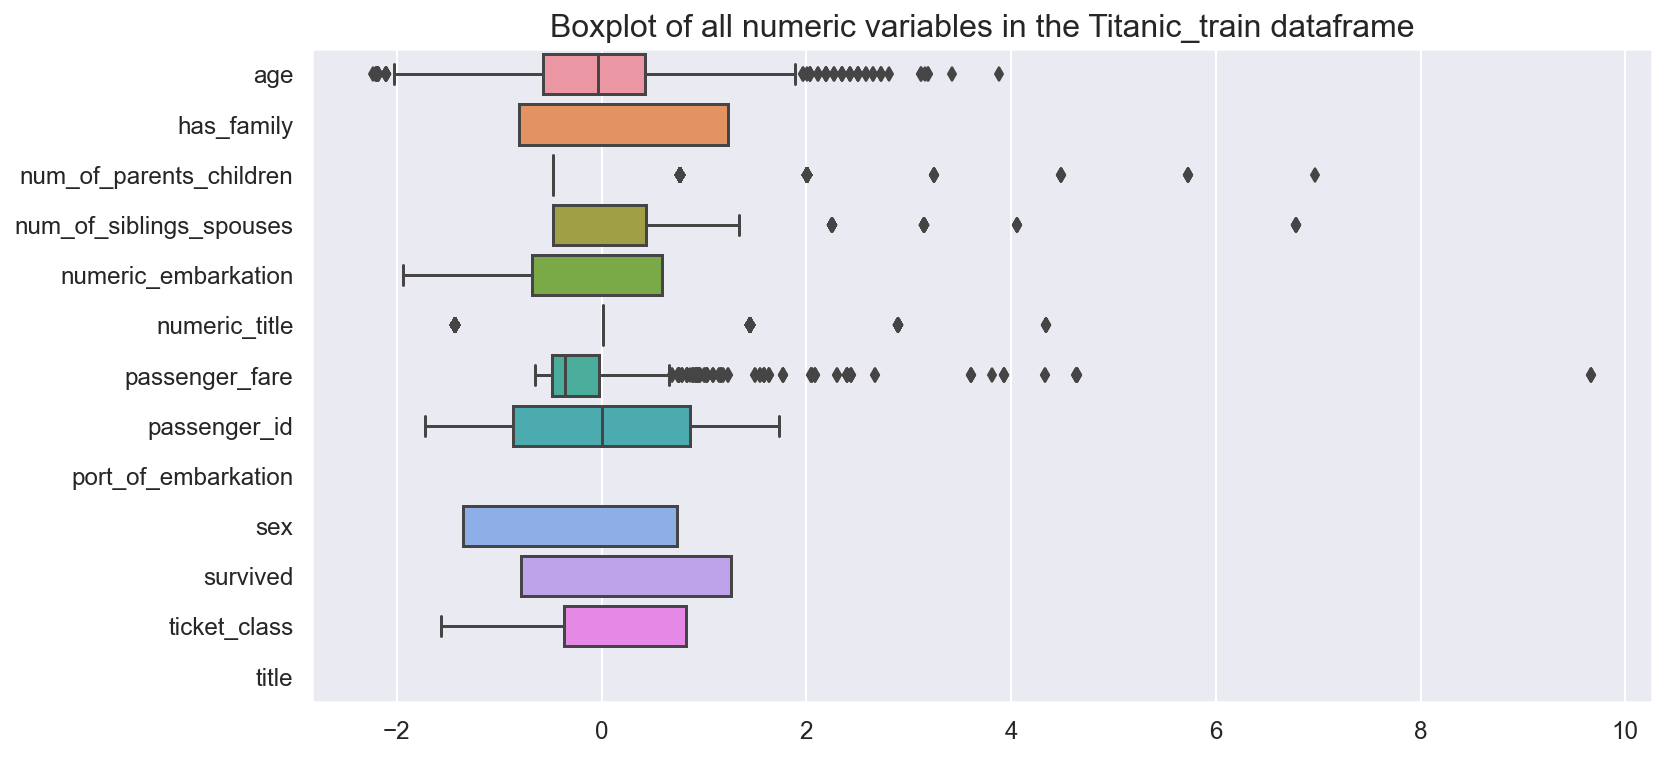

In [839]:
# visualize the data Boxplots to identify outliers

# First, we need to standardize our dataframe, so all the values can be on the same scale
Titanic_train_stand = (Titanic_train - Titanic_train.mean()) / Titanic_train.std()

# Then, we plot the data
plt.figure(figsize=(12,6))
sns.boxplot(data=Titanic_train_stand, orient='h');
plt.title('Boxplot of all numeric variables in the Titanic_train dataframe' , fontsize=16);

## Preprocessing and Modeling
---

### Preprocessing

#### Processing categorical variables:

**\['sex'\] variable** : (Nominal Feature)

**\['has_family'\] variable** : (Nominal Feature)

Even though these variable are Nominal, we did not need to perform one hot encoding since they only have two categories (0 - 1)

**\['ticket_class'\] variable** : (Ordinal Feature)

We did not need to perform one hot encoding here as it is an Ordinal variable. However, since class 1 represents the best class, we should give it the highest value in \['ticket_class'\], because a higher value means it's better in some protection algorithms.

In [840]:
# Deal with the ordinal features
Titanic_train = Titanic_train.replace({"ticket_class": {1: 3, 3: 1}})
Titanic_test = Titanic_test.replace({"ticket_class": {1: 3, 3: 1}})

**\['port_of_embarkation'\] variable** : (Nominal Feature)

**\['title'\] variable** : (Nominal Feature)

We need to perform one hot encoding here.

In [841]:
## One Hot Encoding ##

# create dummy variables for the 'port_of_embarkation' & 'titel' Features 

Titanic_train = pd.get_dummies(Titanic_train, columns=['port_of_embarkation', 'title'], 
                               prefix=['embarkation_port', 'title'], drop_first=True)

Titanic_test = pd.get_dummies(Titanic_test, columns=['port_of_embarkation', 'title'], 
                               prefix=['embarkation_port', 'title'], drop_first=True)

In [842]:
# removing 'numeric_embarkation' & 'numeric_title' from Titanic_train dataframe
Titanic_train.drop(['numeric_title', 'numeric_embarkation'], axis=1, inplace=True)

In [844]:
Titanic_train.head()

,passenger_id,survived,ticket_class,sex,age,num_of_siblings_spouses,num_of_parents_children,passenger_fare,has_family,embarkation_port_Q,embarkation_port_S,title_Mr,title_Mrs,title_Officer,title_Royalty
0,1,0,1,1,22.0,1,0,7.2500,1,0,1,1,0,0,0
1,2,1,3,0,38.0,1,0,71.2833,1,0,0,0,1,0,0
2,3,1,1,0,26.0,0,0,7.9250,0,0,1,0,0,0,0
3,4,1,3,0,35.0,1,0,53.1000,1,0,1,0,1,0,0
4,5,0,1,1,35.0,0,0,8.0500,0,0,1,1,0,0,0


In [845]:
Titanic_test.head()

,passenger_id,ticket_class,sex,age,num_of_siblings_spouses,num_of_parents_children,passenger_fare,has_family,embarkation_port_Q,embarkation_port_S,title_Mr,title_Mrs,title_Officer
0,892,1,1,34.5,0,0,7.8292,0,1,0,1,0,0
1,893,1,0,47.0,1,0,7.0000,1,0,1,0,1,0
2,894,2,1,62.0,0,0,9.6875,0,1,0,1,0,0
3,895,1,1,27.0,0,0,8.6625,0,0,1,1,0,0
4,896,1,0,22.0,1,1,12.2875,1,0,1,0,1,0


#### Features Selection:

For this project, to be able to find the best predictive model and answer the question: “what sorts of people were more likely to survive?”, we decided to build, evaluate, and compare our prediction models using:
 - The whole set of features.
 - A subset of 4 essential features to remove noisy and multicollinear features. We chose these features based on all our observations above and based on the importance of the features which we found using the (feature_importances_) attribute from the RandomForestClassifier (check the figure below).
     - **\['passenger_fare', 'age', 'sex', 'title_Mr'\]**
   
   

##### Compute the importance of the features

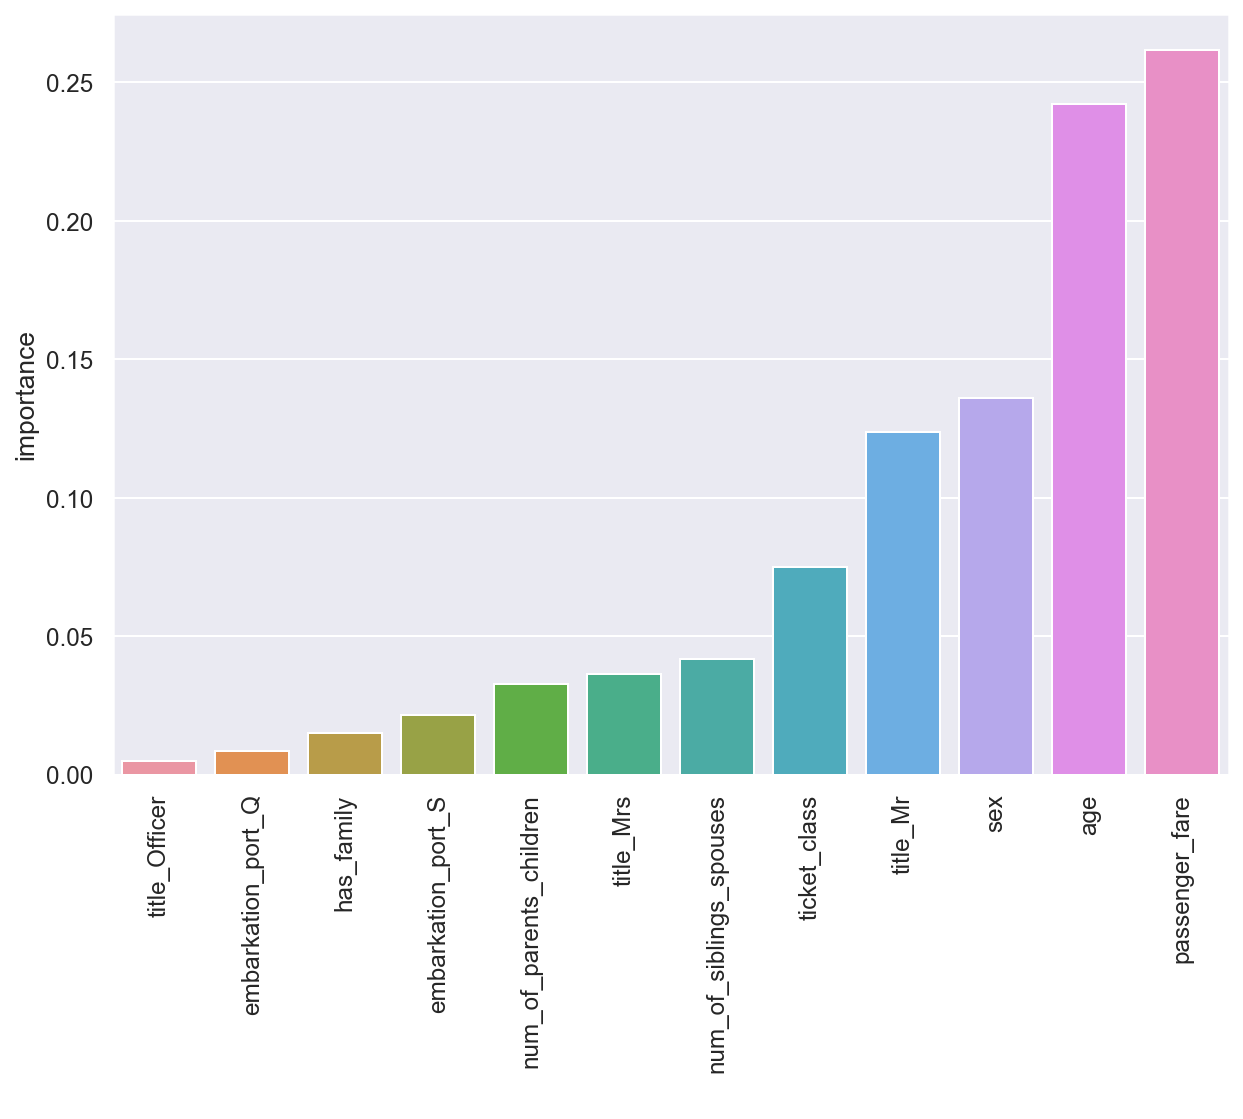

In [847]:
# using RandomForestClassifier to compute the importance of features

train_data = Titanic_train[['ticket_class', 'sex', 'age',
                        'num_of_siblings_spouses', 'num_of_parents_children', 'passenger_fare',
                        'has_family', 'embarkation_port_Q', 'embarkation_port_S', 'title_Mr',
                        'title_Mrs', 'title_Officer']]
target_data = Titanic_train['survived']

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train_data, target_data)

feature_importances = pd.DataFrame()
feature_importances['features'] = train_data.columns
feature_importances['importance'] = clf.feature_importances_

plt.figure(figsize=(10,7))
# make barplot and sort bars
sns.barplot(x='features',
            y='importance', 
            data=feature_importances, 
            order=feature_importances.sort_values('importance').features);
plt.xticks(rotation=90);
plt.xlabel(' ');

#### Extract predictors and target data

In [848]:
# Extract predictors and target from the training data
# in second trial use : X_train = Titanic_train[['passenger_fare', 'age', 'sex', 'title_Mr']]
X_train = Titanic_train[['ticket_class', 'sex', 'age',
                        'num_of_siblings_spouses', 'num_of_parents_children', 'passenger_fare',
                        'has_family', 'embarkation_port_Q', 'embarkation_port_S', 'title_Mr',
                        'title_Mrs', 'title_Officer']]

y_train = Titanic_train['survived']

# Extract predictors from the testing data
# in second trial use : X_test = Titanic_train[['passenger_fare', 'age', 'sex', 'title_Mr']]
X_test = Titanic_test[['ticket_class', 'sex', 'age',
                        'num_of_siblings_spouses', 'num_of_parents_children', 'passenger_fare',
                        'has_family', 'embarkation_port_Q', 'embarkation_port_S', 'title_Mr',
                        'title_Mrs', 'title_Officer']]

# output file name
model_version = '7th_trial_All_Col_'

#### Data Scaling

Noticing that most of our dataset is categorical data, and since categorical data do not need scaling we decided to try scaling only the numerical features, and from an experimental not theoretical point of view, it turns out to give slightly better results than Standard Scaling the whole data frame.

In [849]:
# data Scaling

#Initialize the MinMaxScaler scaler.
scaler = MinMaxScaler()

Xs_train = X_train.copy()
Xs_test = X_test.copy()

# update the numeric cols with their scaled values
Xs_train[['age', 'passenger_fare']] = scaler.fit_transform(Xs_train[['age', 'passenger_fare']])
Xs_test[['age', 'passenger_fare']] = scaler.transform(Xs_test[['age', 'passenger_fare']])

#### Train/Test split
We do not need to (Train/Test) split this data because it was already split by Kaggle.

### Modeling
**For this project, we decided  to work with the following algorithms:**
 - **K-nearest neighbors**; in this method, the target value is assigned to the class most common among its k nearest neighbors (based on some distance measure). It is fast in model training, however, it has some drawbacks like storing the whole training data, sensitivity to irrelevant features, and the scale of the data.
 - **Decision Tree**; this model predicts the value of a target variable by learning simple decision rules inferred from the data features (the decision rules are generally in form of if-then-else statements). It is not sensitive to outliers and the scale of the data, however, the way it is splitting the data at the start may not lead to the most accurate predictions.
 - **Ensemble Bagging (with KNN)**
 - **Ensemble Bagging (with Decision Tree)**
 - **Random Forests**
    - Ensemble Bagging and Random Forests are ensemble methods that colud improve predictive accuracy by combining several base models in order to enlarge the space of possible hypotheses to represent our data. Ensembles are often much more accurate than the base classifiers that compose them.
 
We chose to work with KNN and Decision Tree as they are robust against outliers, and since our data is not normally distributed, we tried to use Ensemble Bagging and Random Forests.

**For each model we:**
 1. Used the Titanic_train dataset to build a predictive model.
 2. Evaluated the model using the accuracy score of the Titanic_train dataset, 5-fold cross-validation, and F1 score.
 3. Used the model to predict the survival values for the Titanic_test dataset, and generate an output file for the Kaggle submission.

### KNN Model

In [722]:
### Bulid KNN model using Elbow method to choose the k value##

def KNN_model(Xs_train, y_train, Xs_test):
    
    # Initializing an empty list to get the score for every k 
    knn_scores = []

    # run a loop for k from 1 to 30
    for i in range(1,30):

        # Initializing knn for k = i
        knn = KNeighborsClassifier(n_neighbors=i)
        
        # find cross val score for k=i
        score_k = np.mean( cross_val_score(knn , Xs_train , y_train , cv = 5) )
        
        # appending score_k to the scores list
        knn_scores.append(score_k)
     
    
    # extract the best K value from cross validation
    best_K = knn_scores.index( np.max(knn_scores) ) + 1
    print('best_K:', best_K)
    
    
    # Initialize the model using the best K value
    best_knn = KNeighborsClassifier(n_neighbors=best_K)
    
    # fit the model
    best_knn.fit(Xs_train, y_train)
    
    # predicting using the best K value
    predictions = best_knn.predict(Xs_test)
    
    # Score the model
    training_score = best_knn.score(Xs_train, y_train)
    print("KNN training score: " , training_score )

    # Cross validate score
    print("KNN cross validation score: " , np.max(knn_scores) )
    
    # F1-SCORE
    F1_score = f1_score(y_train, best_knn.predict(Xs_train))
    print("KNN F1_score: " , F1_score ) 
    
    # create output dataframe
    ids=Titanic_test['passenger_id']
    output = pd.DataFrame({'PassengerId':ids , 'Survived':predictions})
    output.set_index('PassengerId', inplace=True)
    
     # save output file 
    file_name = './predictions/KNN_' + model_version + '.csv'
    output.to_csv(file_name)

### KNN Model (with grid_search)

In [723]:
### Bulid KNN model using grid-search ##

def KNN_model_grid_search(Xs_train, y_train, Xs_test):
    
    param_grid = {
    'n_neighbors': range(1,21,2),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean', 'minkowski'] }

    # Initialize the model using the best K value
    knn = KNeighborsClassifier()
    
    # grid-search
    gs = GridSearchCV(knn, 
                      param_grid, 
                      cv=5)
    
    # fit the model
    gs.fit(Xs_train, y_train)
    
    # Getting the best estimator
    print('Best estimator:', gs.best_estimator_)
    
    # predicting using the best K value
    predictions = gs.predict(Xs_test)
    
    # Score the model
    training_score = gs.score(Xs_train, y_train)
    print("KNN with grid search training score: " , training_score )

    # Cross validate score
    cv_score = np.mean( cross_val_score(gs , Xs_train , y_train , cv = 5) )
    print("KNN with grid search cross validation score: " , cv_score )
    
    # F1-SCORE
    F1_score = f1_score(y_train, gs.predict(Xs_train))
    print("KNN F1_score: " , F1_score ) 
    
    # create output dataframe
    ids=Titanic_test['passenger_id']
    output = pd.DataFrame({'PassengerId':ids , 'Survived':predictions})
    output.set_index('PassengerId', inplace=True)
    
     # save output file 
    file_name = './predictions/KNN_grid_search_' + model_version + '.csv'
    output.to_csv(file_name)

### Decision Tree Model

In [724]:
### Bulid Decision Tree Classification model

def Decision_Tree(Xs_train, y_train, Xs_test):
        
    # Initialize the model 
    clf = tree.DecisionTreeClassifier(max_depth = 3)
    
    # fit the model
    clf = clf.fit(Xs_train, y_train)
        
    # predicting test survivel values
    predictions = clf.predict(Xs_test)
    
    # Score the model
    training_score = clf.score(Xs_train, y_train)
    print("Decision_Tree training score: " , training_score)

    # Cross validate score
    cv_score = np.mean( cross_val_score(clf , Xs_train , y_train , cv = 5) )
    print("Decision_Tree cross validation score: " ,  cv_score )
    
    # F1-SCORE
    F1_score = f1_score(y_train, clf.predict(Xs_train))
    print("KNN F1_score: " , F1_score ) 
    
    # create output dataframe
    ids=Titanic_test['passenger_id']
    output = pd.DataFrame({'PassengerId':ids , 'Survived':predictions})
    output.set_index('PassengerId', inplace=True)
    
    # save output file 
    file_name = './predictions/Decision_Tree_' + model_version + '.csv'
    output.to_csv(file_name)

### Bagging Classifier (with KNN)

In [725]:
# Tune the bagging classifiers with grid search

param = { 'max_features': [0.6, 0.7, 0.8, 0.9, 1.0],
         'n_estimators': [10, 20, 50, 100], 
         'base_estimator__n_neighbors': [*range(1, 21, 2)] ,
         'max_samples':[0.5, 0.7 ,0.9, 1.0],
         'bootstrap':[True,False]
        }

model = BaggingClassifier(base_estimator=KNeighborsClassifier())

model_gs = GridSearchCV(model, param, cv=5) # , verbose=1, n_jobs=-1 )

# fit model
model_gs.fit(Xs_train, y_train)

# check best paramters
model_gs.best_params_


{'base_estimator__n_neighbors': 7,
 'bootstrap': True,
 'max_features': 0.6,
 'max_samples': 0.9,
 'n_estimators': 20}

In [726]:
### Bulid Bagging + KNN Classification model
# using the best paramters from tuneing the bagging classifiers with grid search:
# {'base_estimator__n_neighbors': 7,
#  'bootstrap': True,
#  'max_features': 0.6,
#  'max_samples': 0.9,
#  'n_estimators': 20}

def Bagging_KNN(Xs_train, y_train, Xs_test):

    # Initialize the knn model
    knn = KNeighborsClassifier(n_neighbors = 7)

    # Initialize the BaggingClassifier model using the best paramters
    knn_en = BaggingClassifier(base_estimator = knn, n_estimators = 20 ,  bootstrap = True, 
                               max_features =  0.6, max_samples = 0.9)

    # fit the model
    knn_en.fit(Xs_train, y_train)

    # predicting test survivel values
    predictions = knn_en.predict(Xs_test)

    # Score the model
    training_score = knn_en.score(Xs_train, y_train)
    print("KNN with Bagging Classifier training score: " , training_score )

    # Cross validate score
    cv_score = np.mean( cross_val_score(knn_en , Xs_train , y_train , cv = 5) )
    print("KNN with Bagging Classifier cross validation score: " , cv_score )
    
    # F1-SCORE
    F1_score = f1_score(y_train, knn_en.predict(Xs_train))
    print("KNN F1_score: " , F1_score ) 
    
    # create output dataframe
    ids=Titanic_test['passenger_id']
    output = pd.DataFrame({'PassengerId':ids , 'Survived':predictions})
    output.set_index('PassengerId', inplace=True)

     # save output file 
    file_name = './predictions/KNN_Bagging_' + model_version + '.csv'
    output.to_csv(file_name)

### Bagging Classifier (with Decision Tree)

In [727]:
# Tune the bagging classifiers with grid search

param = { 'max_features': [0.6, 0.7, 0.8, 0.9, 1.0],
         'n_estimators': [10, 20, 50, 100], 
         'base_estimator__max_depth': [3,4,5],
         'max_samples':[0.5, 0.7 ,0.9, 1.0],
         'bootstrap':[True,False] }

model = BaggingClassifier( base_estimator = tree.DecisionTreeClassifier() )

model_gs = GridSearchCV(model, param, cv=5) # , verbose=1, n_jobs=-1 )

# fit model
model_gs.fit(Xs_train, y_train)

# check best paramters
model_gs.best_params_


{'base_estimator__max_depth': 5,
 'bootstrap': False,
 'max_features': 1.0,
 'max_samples': 0.7,
 'n_estimators': 10}

In [728]:
### Bulid Bagging + Decision Tree Classification model
# using the best paramters from tuneing the bagging classifiers with grid search:
# {'base_estimator__max_depth': 5,
#  'bootstrap': False,
#  'max_features': 1.0,
#  'max_samples': 0.7,
#  'n_estimators': 10}

def Bagging_Decision_Tree(Xs_train, y_train, Xs_test):

    # Initialize the Decision Tree model
    clf = tree.DecisionTreeClassifier(max_depth = 5 )

    # Initialize the BaggingClassifier model using the best paramters
    clf_en = BaggingClassifier(base_estimator = clf, n_estimators =  10 ,  bootstrap = False , 
                               max_features = 1.0  , max_samples = 0.7 )

    # fit the model
    clf_en.fit(Xs_train, y_train)

    # predicting test survivel values
    predictions = clf_en.predict(Xs_test)

    # Score the model
    training_score = clf_en.score(Xs_train, y_train)
    print("Decision_Tree with Bagging Classifier training score: " , training_score )

    # Cross validate score
    cv_score = np.mean( cross_val_score(clf_en , Xs_train , y_train , cv = 5) )
    print("Decision_Tree with Bagging Classifier cross validation score: " , cv_score )
    
    # F1-SCORE
    F1_score = f1_score(y_train, clf_en.predict(Xs_train))
    print("KNN F1_score: " , F1_score ) 
    
    # create output dataframe
    ids=Titanic_test['passenger_id']
    output = pd.DataFrame({'PassengerId':ids , 'Survived':predictions})
    output.set_index('PassengerId', inplace=True)

     # save output file 
    file_name = './predictions/Decision_Tree_Bagging_' + model_version + '.csv'
    output.to_csv(file_name)

### Random Forests Model

In [729]:
# Tune the Random Forests with grid search

param = { 
            'max_depth' : [4, 6, 8],
            'n_estimators': [50, 10],
            'max_features': ['sqrt', 'auto', 'log2'],
            'min_samples_split': [2, 3, 10],
            'min_samples_leaf': [1, 3, 10],
            'bootstrap': [True, False],
        }

model = RandomForestClassifier()

model_gs = GridSearchCV(model, param, cv=5) # , verbose=1, n_jobs=-1 )

# fit model
model_gs.fit(Xs_train, y_train)

# check best paramters
model_gs.best_params_


{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [730]:
### Bulid Random Forests Classification model
# using the best paramters from tuneing the bagging classifiers with grid search:
# {'bootstrap': True,
#  'max_depth': 8,
#  'max_features': 'auto',
#  'min_samples_leaf': 1,
#  'min_samples_split': 10,
#  'n_estimators': 50}


def Random_Forests(Xs_train, y_train, Xs_test):
        
    # Initialize the model using the best paramters
    RF = RandomForestClassifier( bootstrap = True,
                                max_depth = 8,
                                max_features = 'auto',
                                min_samples_leaf = 1,
                                min_samples_split = 10,
                                n_estimators = 50 )
    
    # fit the model
    RF = RF.fit(Xs_train, y_train)
        
    # predicting test survivel values
    predictions = RF.predict(Xs_test)
    
    # Score the model
    training_score = RF.score(Xs_train, y_train)
    print("Random_Forests training score: " , training_score)

    # Cross validate score
    cv_score = np.mean( cross_val_score(RF , Xs_train , y_train , cv = 5) )
    print("Random_Forests cross validation score: " ,  cv_score )
    
    # F1-SCORE
    F1_score = f1_score(y_train, RF.predict(Xs_train))
    print("KNN F1_score: " , F1_score ) 
    
    # create output dataframe
    ids=Titanic_test['passenger_id']
    output = pd.DataFrame({'PassengerId':ids , 'Survived':predictions})
    output.set_index('PassengerId', inplace=True)
    
    # save output file 
    file_name = './predictions/Random_Forests_' + model_version + '.csv'
    output.to_csv(file_name)

### Calling The Modeling Functions

In [ ]:
KNN_model(Xs_train, y_train, Xs_test)

In [ ]:
KNN_model_grid_search(Xs_train, y_train, Xs_test)

In [ ]:
Decision_Tree(Xs_train, y_train, Xs_test)

In [ ]:
Bagging_KNN(Xs_train, y_train, Xs_test)

In [ ]:
Bagging_Decision_Tree(Xs_train, y_train, Xs_test)

In [ ]:
Random_Forests(Xs_train, y_train, Xs_test)

## Evaluation and Conceptual Understanding
---

### baseline accuracy:

The baseline accuracy is the percentage of the majority class, which is in this project (class 0; unserviced).

**Baseline accuracy = 0.616162** , and all models we tested have beaten this benchmark score.

In [850]:
Titanic_train['survived'].value_counts()/len(Titanic_train['survived'])

0    0.616162
1    0.383838
Name: survived, dtype: float64

### Results:

For each model we trained, we evaluated its performance on the training dataset using:
 1. Accuracy score (The same metric that the Kaggle competition uses in the leaderboard)
 2. 5-fold cross-validation (To diagnose the existence of overfitting)
 3. F1 score (To check how good the model in terms of precision and recall)

| Model | Score | All Features | Subset of 4 Features |
| ------|-------|--------------|----------------------|
|KNN    |Accuracy |    0.83501     | 0.79573 |
|       |cross validation |  0.81370 |  0.79011 |
|       | F1_score|  0.75621  |  0.73076|
|KNN with grid search| Accuracy|  0.83950  |  0.79573 |
|                    |cross validation |  0.80920 |  0.78116 |
|                    |F1_score |  0.77409  |  0.73076 |
|Decision_Tree |Accuracy|  0.82716  |  0.79685 |
|              |cross validation| 0.80919 |  0.78454  |
|              |F1_score |  0.76012 |  0.71315  |
|Bagging Classifier(KNN) | Accuracy | 0.85072  | 0.83041 |
|                        |cross validation|  0.81709  |  0.79909 |
|                        |F1_score | 0.78651  | 0.80634 |
|Bagging Classifier(Decision_Tree)| Accuracy | 0.85409 |  0.82603 |
|                                 |cross validation| 0.82269 |  0.80023 |
|                                 |F1_score | 0.79233 |  0.76761 |
|Random_Forests |Accuracy | 0.90327 | 0.84511 |
|               |cross validation | 0.82156 | 0.79461 |
|               |F1_score |  0.83596  | 0.79402|

### Results Interpretation:

When comparing our results in terms of the type of model, we can see that the results don’t vary that much and they are close to each other, however, it is clear that the bagging classifier and the random forests give better results than the other models. In addition, even though the random forest model has the best training scores it seems that it struggles with the overfitting problem since the accuracy score is really higher than the cross-validation score.

In terms of features selection, we can obviously see that using all features gives much better results than using the subset of the four features we chose. And this may indicate that we did not select the best subset of features.

And in terms of the evaluation methods, the F1 scores are mostly the closest to the real testing scores (from Kaggle).

 ### Best result from Kaggle:
 
We obtained the best Kaggle result using the whole set of features to build a Bagging Classification model (with both KNN and Decision Tree)

![](Best_Kaggle_Result_.png)

## Conclusions and Recommendations
---

In this project, we worked on the Titanic challenge, an interesting competition hosted by Kaggle. In which, we tried to predict if a given passenger survived or not based on a set of variables describing this passenger. To do that, we performed the following essential steps:
- Cleaning the data (to deal with wrong data)
- EDA and Data Visualization (to understand the data and the relationships in it)
- Preprocessing the data, and Building the prediction models
- Evaluating the prediction scores, and Submitting the prediction to Kaggle

To solve this problem, we tried to use 2 different sets of features to train several classification models with the best parameters obtained from a grid search. In conclusion, we were able to build a model with a (79% accuracy) in predicting the sorts of people who were more likely to survive in Titanic. And to get such accuracy we recommend using the whole set of training features to build a Bagging Classification model (with either KNN or Decision Tree).

Finally, for future work, we would like to improve our results even more by experimenting with the following  suggestions:
 - Do more work on the data and features engineering
 - Select a better set of training features
 - Try different classification models, maybe (AdaBoost or Gradient Tree Boosting)

### Link to the Titanic Survival group kernel in Kaggle:
    
https://www.kaggle.com/abeeralzuhair2020/titanic-challenge-dsi-group3